In [22]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline

In [2]:
df = pd.read_csv('data/dataset.csv')
df.head()

,Subj,Y,ROI
0,P0,0.0915,vmPFC
1,P0,0.5290,PCC1
2,P0,0.3904,PCC2
3,P0,0.6907,rPAG1
4,P0,-0.0709,lPAG1


In [3]:
rois = df.ROI.unique()

In [8]:
def bootstrap_replicate_1d(data,func,N=1):
    """ Generate bootstrap replicate of 1D data. """
    bs_sample = np.random.choice(data,size=N)
    return func(bs_sample)

def draw_bs_reps(data,func,N,size=1):
    """ Draw bootstrap replicates. """
    
    # initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func,N=N)
    return bs_replicates

## **Bootstrap estimation of 95% confidence interval.**

From the "population" of 61 participants, random samples of size N = 30 (plots on left) and 61 (plots on the right) were drawn with replacement; sample mean was computed for each draw (total 500 draws) and following distribution of the sample mean was created for each ROI. Shaded region is the 95% CI.

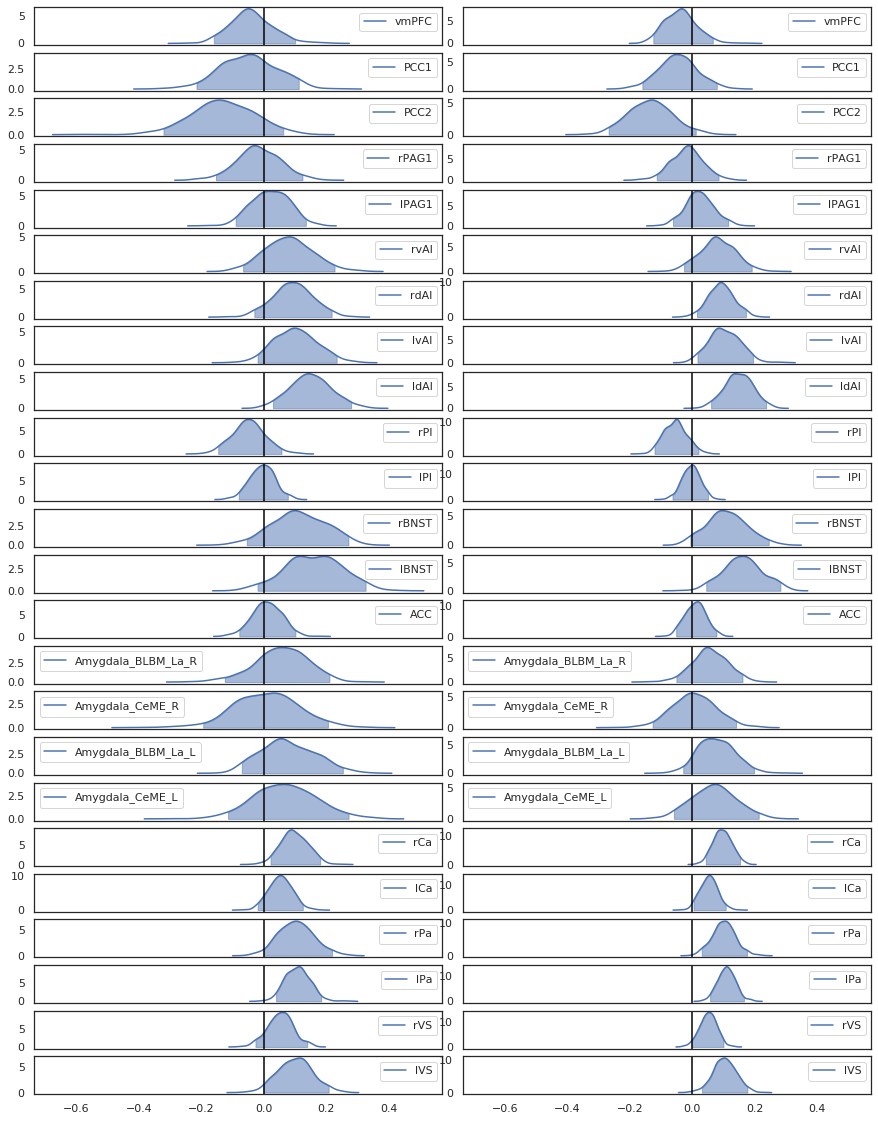

In [21]:
np.random.seed(42)

fig, axes = plt.subplots(ncols=2,nrows=24,figsize=(15,20),sharex=True)
fig.subplots_adjust(wspace=0.05)
from collections import defaultdict

samp_dist = defaultdict(list)
for j, N in enumerate([30,61]):
    for i,roi in enumerate(rois):
        data= df[df['ROI']==roi].Y.values
        samp_dist[roi] = draw_bs_reps(data,np.mean,N=N,size=500)
        lb,ub = np.percentile(samp_dist[roi],[2.5,97.5])
        shade_idx = np.logical_and(samp_dist[roi] >= lb, samp_dist[roi] <= ub)
        y = sns.kdeplot(samp_dist[roi],ax=axes[i,j],legend=True,label=roi)
        x_vals,y_vals = y.lines[0].get_data()
        ci_idx = np.logical_and(x_vals >= lb,x_vals<=ub)
        _=axes[i,j].axvline(x=0,color='black')
        _=axes[i,j].fill_between(x=x_vals[ci_idx],y1=y_vals[ci_idx],color='C0',alpha=0.5)